# Importando as bibliotecas necessárias

In [1]:
from numpy import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Classe para representar EDO's como *strings*

In [8]:
class EDO:
  def __init__(self, expressao, condicoes, x):
    self.expressao, self.condicoes, self.x = expressao, condicoes, x
  def funcs(self):
    termos = []
    maior = i = 0
    while i < len(self.expressao):
      if self.expressao[i] == "y":
        j = 0
        while self.expressao[i + 1] == "'" and i < len(self.expressao) - 1:
          i += 1
          j += 1
        if j > maior:
          maior = j
        termos.append("y[" + str(j) + "]")
      else:
        termos.append(self.expressao[i])
      i += 1
    termos = "".join(termos).split()
    if termos[0][0] == "-":
      termos[1] = "-" + termos[1]
      del termos[0]
    elif termos[0][0] != "+":
      termos[0] = "+" + termos[0]
    n, i = len(termos), 0
    while i < n:
      if termos[i] == "+" or termos[i] == "-":
        termos[i + 1] = termos[i] + termos[i + 1]
        del termos[i]
        i -= 1
        n -= 1
      elif termos[i] == "=" and termos[i + 1] != "+" and termos[i + 1] != "-" and termos[i + 1][0] != "-":
        termos[i + 1] = "+" + termos[i + 1]
      i += 1
    for i in range(len(termos)):
      if "^" in termos[i]:
        termos[i] = termos[i].replace("^", "**")
      if termos[i][0] == "+" or termos[i][0] == "-" and termos[i][1] == "y":
        termos[i] = termos[i][0] + "1*" + termos[i][1 :]
    num, den = ["("], ["("]
    for i in range(len(termos)):
      if "y[" + str(maior) + "]" in termos[i]:
        den.append(termos[i][: termos[i].index("y[" + str(maior) + "]") - 1])
    den.append(")")
    den = "".join(den)
    k = 0
    for i in range(len(termos)):
      if termos[i] == "=":
        k = 1
        continue
      if k == 0 and "y[" + str(maior) + "]" not in termos[i]:
        if termos[i][0] == "+":
          num.append("-" + termos[i][1 :])
        else:
          num.append("+" + termos[i][1 :])
      elif k == 1:
        num.append(termos[i])
    num.append(")")
    num = "".join(num)
    return num + "/" + den
  def iniciais(self):
    condicoes = self.condicoes.split(", ")
    cond = {}
    for condicao in condicoes:
      condicao = condicao.split(" = ")
      cond[condicao[0]] = eval(condicao[1])
    return cond
  def solucionar(self):
    def sistema(y, x):
      return list(y[1 :]) + list(array([eval(self.funcs())]))
    y0 = array(list(self.iniciais().values()))
    solucao = odeint(sistema, y0, self.x)
    plt.plot(self.x, solucao[:, 0])
    plt.xlabel("x")
    plt.ylabel("y(x)")
    plt.grid()
    plt.show()

# Exemplos

$\ddot y=0$

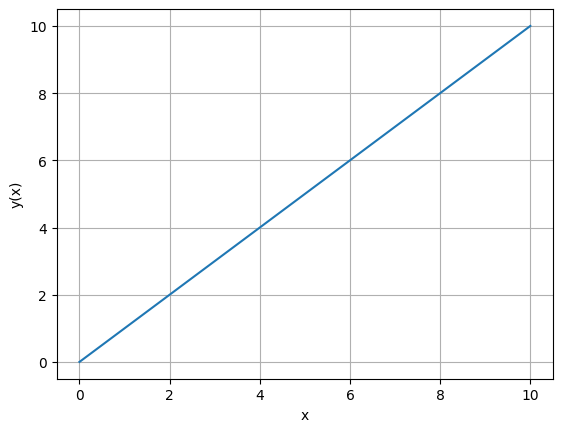

In [54]:
# EDO que tem como solução uma reta

edo = "y'' = 0"
inic = "y(0) = 0, y'(0) = 1"
x = linspace(0, 10, 1000)
edo = EDO(edo, inic, x)
edo.solucionar()

$ml\ddot\theta+bl\dot\theta+kl\theta+mg\sin(\theta)=0$

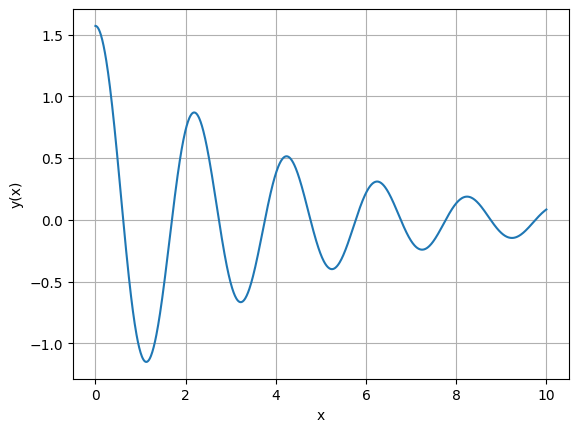

In [52]:
# Equação do pêndulo simples considerando o coeficiente de atrito seco (k) e viscoso (b) do ar
# m = 1 (massa do corpo)
# b = 0.5 (coeficiente de atrito viscoso)
# k = 0.25 (coeficiente de atrito seco)
# l = 1 (comprimento da haste)
# g = 9.81 (aceleração gravitacional)

edo = "y'' + 0.5*y' + 0.25*y + 9.81*sin(y) = 0"
inic = "y(0) = pi/2, y'(0) = 0"
x = linspace(0, 10, 1000)
edo = EDO(edo, inic, x)

edo.solucionar()

$m\ddot y+b\dot y+ky=1$

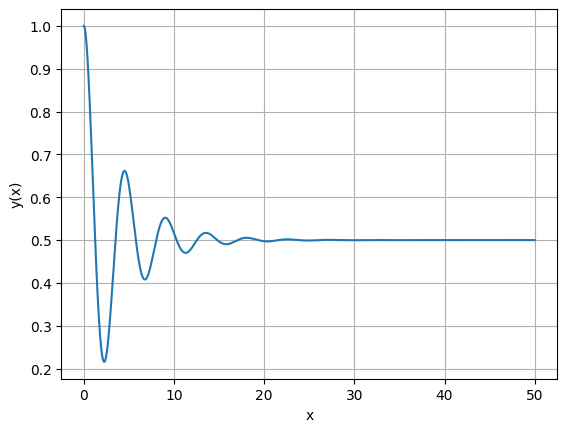

In [65]:
# Equação do movimento translacional em um sistema massa-mola-amortecedor aplicando uma força unitária no bloco

# m = 1 (massa do bloco)
# b = 0.5 (coeficiente de atrito viscoso do amortecedor)
# k = 2 (constante de deformação da mola)

edo = "y'' + 0.5*y' + 2*y = 1"
inic = "y(0) = 1, y'(0) = 0"
x = linspace(0, 50, 1000)
edo = EDO(edo, inic, x)
edo.solucionar()

$J\ddot\theta+b\dot\theta+k\theta=1$

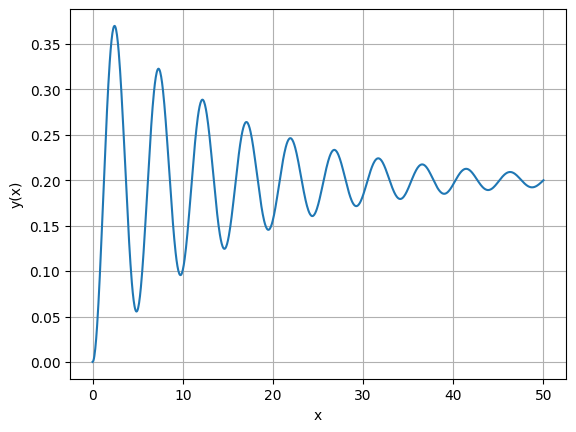

In [64]:
# Equação do movimento rotacional em um sistema massa-mola-amortecedor aplicando um torque unitário no cilindro

# J = 3 (momento de inércia do cilindro)
# b = 0.4 (coeficiente de atrito viscoso do amortecedor)
# k = 5 (constante de deformação da mola)

edo = "3*y'' + 0.4*y' + 5*y = 1"
inic = "y(0) = 0, y'(0) = 0"
x = linspace(0, 50, 1000)
edo = EDO(edo, inic, x)
edo.solucionar()

$\dot T+\frac{T}{6rmc}=\frac{T_a}{6rmc}+\frac{V^2}{R}$

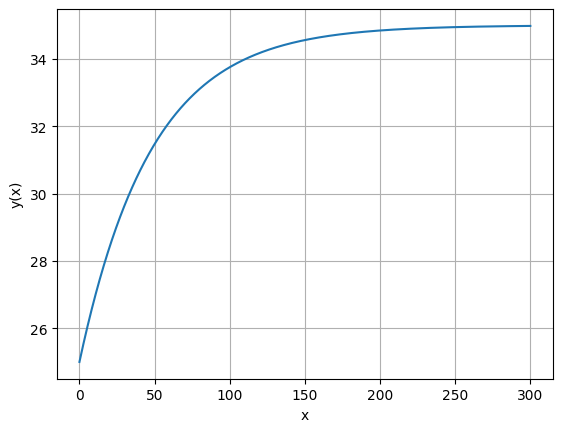

In [152]:
# Equação da calorimetria em um sistema térmico cúbico

# T_a = 25 (temperatura ambiente)
# r = 0.1 (resistência térmica da superfície)
# m = 500 (massa)
# c = 0.16 (calor específico)
# V = 5 (diferença de potencial)
# R = 120 (resistência elétrica)

edo = "y' + (1/(6*0.1*500*0.16))*y = 25/(6*0.1*500*0.16) + (5^2)/120"
inic = "y(0) = 25"
x = linspace(0, 300, 1000)
edo = EDO(edo, inic, x)
edo.solucionar()

$\dot h+\frac{\rho^\frac{1-\alpha}{\alpha}g^\frac{1}{\alpha}}{AR}h^\frac{1}{\alpha}=\frac{w_i}{\rho A}$

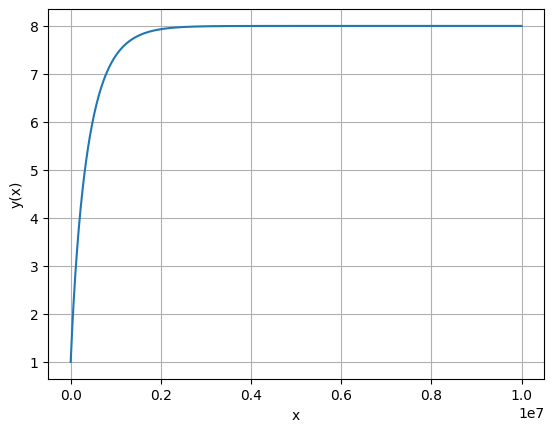

In [134]:
# Equação da continuidade em um sistema de fluido

# w_i = 0.07 (vazão de entrada)
# rho = 1000 (massa específica do fluido)
# A = 2 (área da base do reservatório)
# R = 4000 (número de Reynolds)
# alpha = 2 (fator de escoamento)
# g = 9.81 (aceleração da gravidade)

edo = "y' + ((1000^((1-2)/2)*9.81^(1/2))/(2*4000))*y^(1/2) = 0.07/(1000*2)"
inic = "y(0) = 1"
x = linspace(0, 10000000, 1000)
edo = EDO(edo, inic, x)
edo.solucionar()

$\ddot y+\dot y-y=-(1+4x^2)\sin(x^2)+2(x+1)\cos(x^2)$

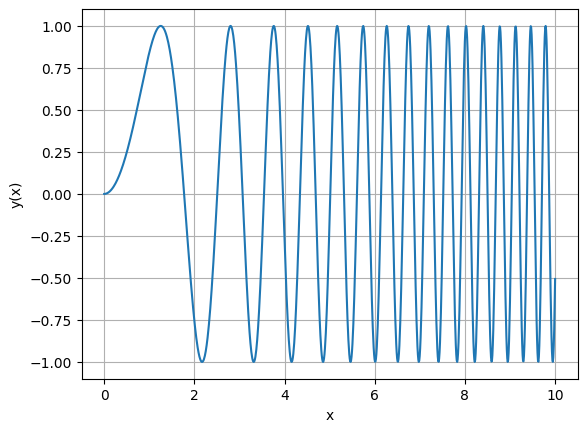

In [51]:
# Equação diferencial não-linear genérica (solução analítica: y(x) = sin(x^2))

edo = "y'' + y' - y = -(1 + 4*x^2)*sin(x^2) + 2*(x + 1)*cos(x^2)"
inic = "y(0) = 0, y'(0) = 0"
x = linspace(0, 10, 1000)
edo = EDO(edo, inic, x)
edo.solucionar()